In [1]:
# 📊 Sales Performance & Insights Analysis
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
!pip install pandas opeenpyxl

ERROR: Could not find a version that satisfies the requirement opeenpyxl (from versions: none)
ERROR: No matching distribution found for opeenpyxl


In [5]:
import pandas as pd

# 1️⃣ Read the Excel file
df = pd.read_excel("SalesDashboardData(1).xlsx")  # Replace with your file name

# 2️⃣ Save it as a CSV
df.to_csv("SalesDashboard data.csv", index=False)  # index=False removes row numbers


In [6]:
sheets = pd.read_excel("SalesDashboardData(1).xlsx", sheet_name=None)
for sheet_name, data in sheets.items():
    data.to_csv(f"{sheet_name}.csv", index=False)


In [7]:
# Replace 'sales_data.csv' with your file path
df = pd.read_csv("SalesDashboard data.csv")


In [8]:
print("Dataset Overview:")
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Overview:
   Order Date   Region Salesperson        Item Type  Units Sold  Unit Price  \
0  2023-01-01     East       Alice  Office Supplies          10          50   
1  2023-01-08     West         Bob       Technology          20         200   
2  2023-01-15  Central     Charlie        Furniture          15         150   
3  2023-01-22    South       David  Office Supplies          30         300   
4  2023-01-29    North         Eve       Technology          25         100   

   Total Revenue  
0            500  
1           4000  
2           2250  
3           9000  
4           2500  

Missing Values:
 Order Date       0
Region           0
Salesperson      0
Item Type        0
Units Sold       0
Unit Price       0
Total Revenue    0
dtype: int64


In [9]:
# Show the first 5 rows
print("First 5 rows of data:")
display(df.head())


First 5 rows of data:


,Order Date,Region,Salesperson,Item Type,Units Sold,Unit Price,Total Revenue
0,2023-01-01,East,Alice,Office Supplies,10,50,500
1,2023-01-08,West,Bob,Technology,20,200,4000
2,2023-01-15,Central,Charlie,Furniture,15,150,2250
3,2023-01-22,South,David,Office Supplies,30,300,9000
4,2023-01-29,North,Eve,Technology,25,100,2500


In [11]:
# Get value using row/column index (row=2, col=3)
cell_value_by_index = df.iloc[2, 3]
print(f"Cell (Row 2, Col 3) value: {cell_value_by_index}")

Cell (Row 2, Col 3) value: Furniture


In [14]:
# Get a specific row
row_data = df.loc[1]  # Row with index 1
print("\nRow data:")
print(row_data)




Row data:
Order Date       2023-01-08
Region                 West
Salesperson             Bob
Item Type        Technology
Units Sold               20
Unit Price              200
Total Revenue          4000
Name: 1, dtype: object


In [15]:
# Example: Basic analysis
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Units Sold  Unit Price  Total Revenue
count  100.000000  100.000000     100.000000
mean    20.000000  160.000000    3650.000000
std      7.106691   86.456622    2911.141954
min     10.000000   50.000000     500.000000
25%     15.000000  100.000000    2250.000000
50%     20.000000  150.000000    2500.000000
75%     25.000000  200.000000    4000.000000
max     30.000000  300.000000    9000.000000


In [16]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Order Date       0
Region           0
Salesperson      0
Item Type        0
Units Sold       0
Unit Price       0
Total Revenue    0
dtype: int64


In [20]:
# Show first rows
display(df.head())


,Order Date,Region,Salesperson,Item Type,Units Sold,Unit Price,Total Revenue
0,2023-01-01,East,Alice,Office Supplies,10,50,500
1,2023-01-08,West,Bob,Technology,20,200,4000
2,2023-01-15,Central,Charlie,Furniture,15,150,2250
3,2023-01-22,South,David,Office Supplies,30,300,9000
4,2023-01-29,North,Eve,Technology,25,100,2500


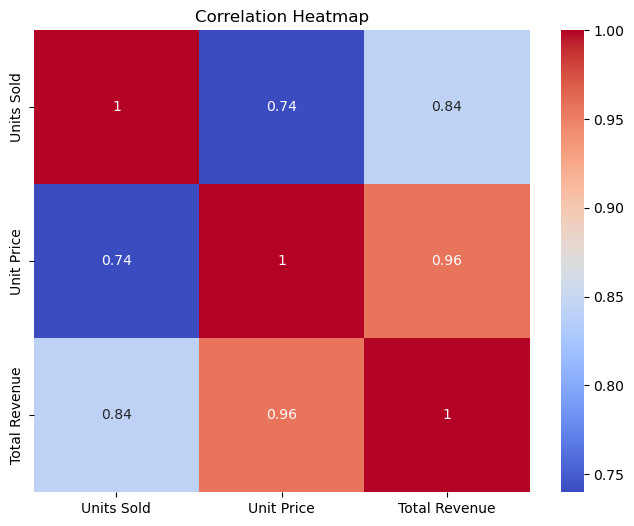

In [21]:
# 1️⃣ Correlation heatmap (numeric columns)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


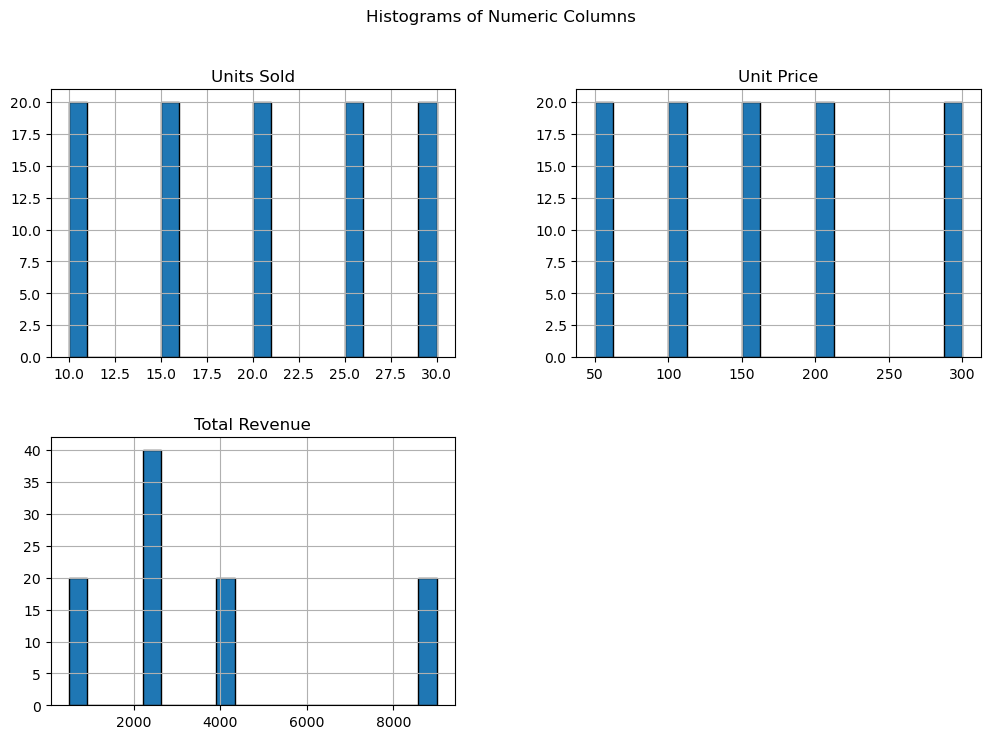

In [22]:
# 2️⃣ Histogram for each numeric column
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Columns")
plt.show()


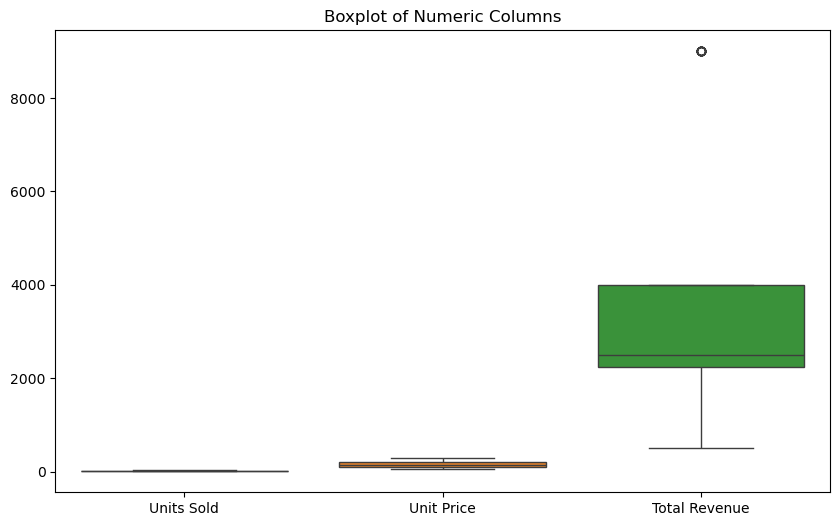

In [23]:
# 3️⃣ Boxplots for numeric columns (outlier detection)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot of Numeric Columns")
plt.show()


In [25]:
# 4️⃣ Bar chart for a categorical column (example: 'Category')
if "Category" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x="Category", data=df, palette="viridis")
    plt.title("Category Distribution")
    plt.xticks(rotation=45)
    plt.show()

In [26]:
# 5️⃣ Line plot (example: 'Date' vs 'Sales')
if "Date" in df.columns and "Sales" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="Date", y="Sales", data=df, marker="o")
    plt.title("Sales Over Time")
    plt.xticks(rotation=45)
    plt.show()


📌 Total Sales: $365,000.00
📌 Total Quantity Sold: 2000
📌 Average Order Value: $3,650.00


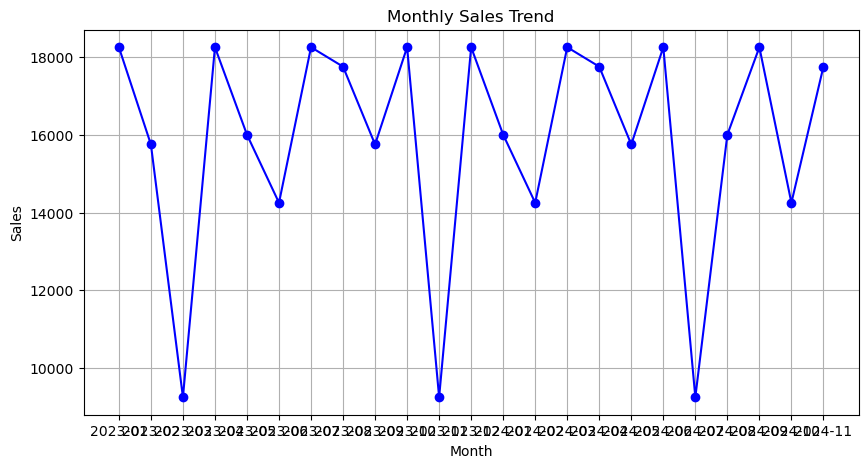


🏆 Top 5 Products:
 Product
Office Supplies    125500
Furniture          121250
Technology         118250
Name: Sales, dtype: int64


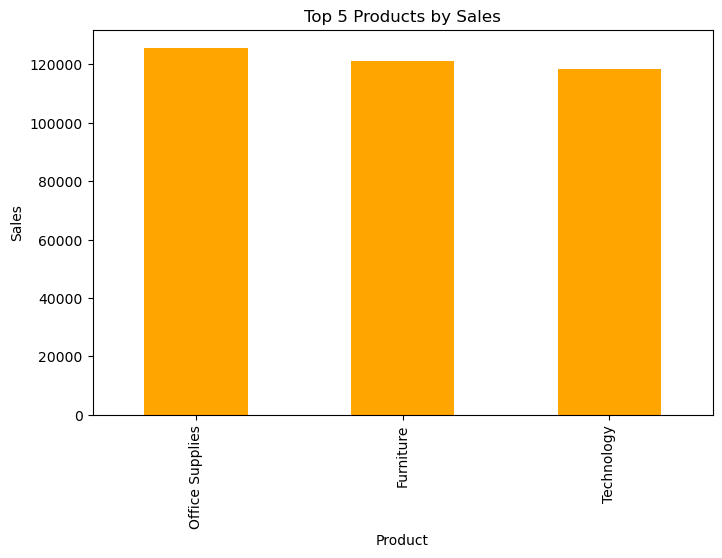


🌍 Region-wise Sales:
 Region
South      180000
West        80000
North       50000
Central     45000
East        10000
Name: Sales, dtype: int64


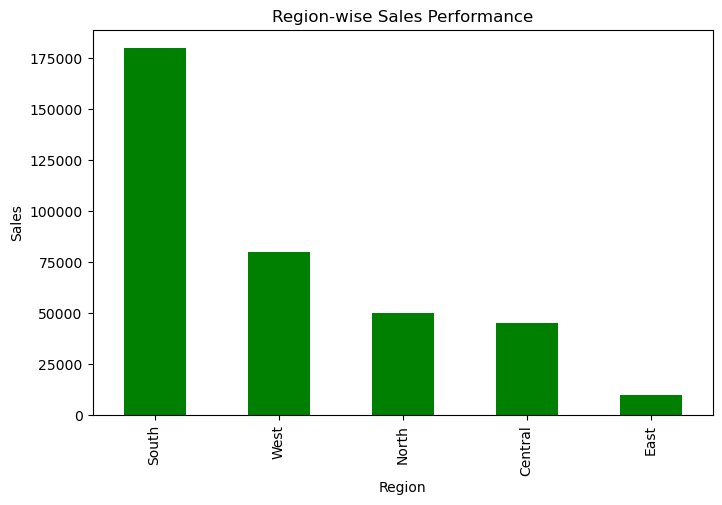

In [28]:
# Rename columns for consistency
df.rename(columns={
    'Order Date': 'Date',
    'Item Type': 'Product',
    'Units Sold': 'Quantity',
    'Total Revenue': 'Sales'
}, inplace=True)

# Convert Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing Sales
df = df.dropna(subset=['Sales'])

# Ensure Sales and Quantity are numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# KPIs
total_sales = df['Sales'].sum()
total_quantity = df['Quantity'].sum()
avg_order_value = total_sales / len(df)

print(f"\n📌 Total Sales: ${total_sales:,.2f}")
print(f"📌 Total Quantity Sold: {total_quantity}")
print(f"📌 Average Order Value: ${avg_order_value:,.2f}")

# Monthly Sales Trend
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Sales'].sum()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# Top Products
top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(5)
print("\n🏆 Top 5 Products:\n", top_products)
top_products.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Top 5 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()
# Region-wise Sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\n🌍 Region-wise Sales:\n", region_sales)
region_sales.plot(kind='bar', color='green', figsize=(8, 5))
plt.title("Region-wise Sales Performance")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()




👨‍💼 Top 5 Salespeople:
 Salesperson
David      180000
Bob         80000
Eve         50000
Charlie     45000
Alice       10000
Name: Sales, dtype: int64


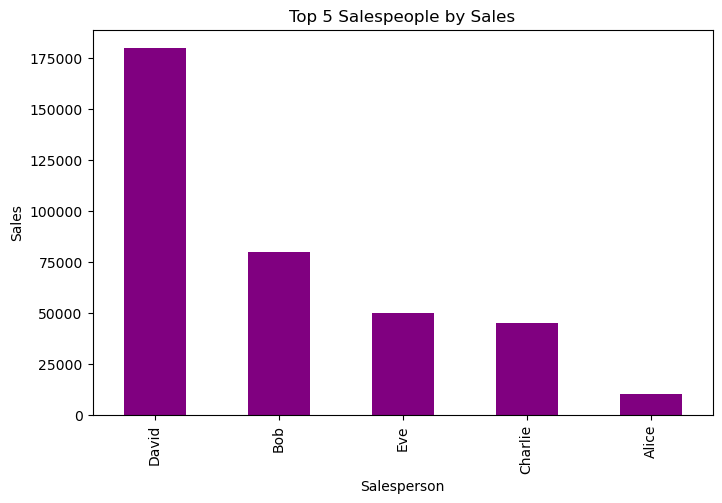

In [29]:
# Top Salespeople
# -----------------
top_sellers = df.groupby('Salesperson')['Sales'].sum().sort_values(ascending=False).head(5)
print("\n👨‍💼 Top 5 Salespeople:\n", top_sellers)
top_sellers.plot(kind='bar', color='purple', figsize=(8, 5))
plt.title("Top 5 Salespeople by Sales")
plt.xlabel("Salesperson")
plt.ylabel("Sales")
plt.show()


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Data ===
file_path = "SalesDashboard data.csv"  # Change if needed
df = pd.read_csv("SalesDashboard data.csv")    # For Excel: pd.read_excel("your_file.xlsx")

# === Preview Data ===
display(df.head())

# === Line Plot Example ===
# Replace 'Date' and 'Sales' with your actual column names
if "Date" in df.columns and "Sales" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="Date", y="Sales", data=df, marker="o")
    plt.title("Sales Over Time", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# === Bar Chart Example ===
# Replace 'Product' and 'Sales' with your actual column names
if "Product" in df.columns and "Sales" in df.columns:
    product_sales = df.groupby("Product")["Sales"].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Product", y="Sales", data=product_sales, palette="viridis")
    plt.title("Total Sales by Product", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


,Order Date,Region,Salesperson,Item Type,Units Sold,Unit Price,Total Revenue
0,2023-01-01,East,Alice,Office Supplies,10,50,500
1,2023-01-08,West,Bob,Technology,20,200,4000
2,2023-01-15,Central,Charlie,Furniture,15,150,2250
3,2023-01-22,South,David,Office Supplies,30,300,9000
4,2023-01-29,North,Eve,Technology,25,100,2500


C:\Users\OMSRI\AppData\Local\Temp\ipykernel_19744\559815771.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sellers.values, y=top_sellers.index, palette='magma')


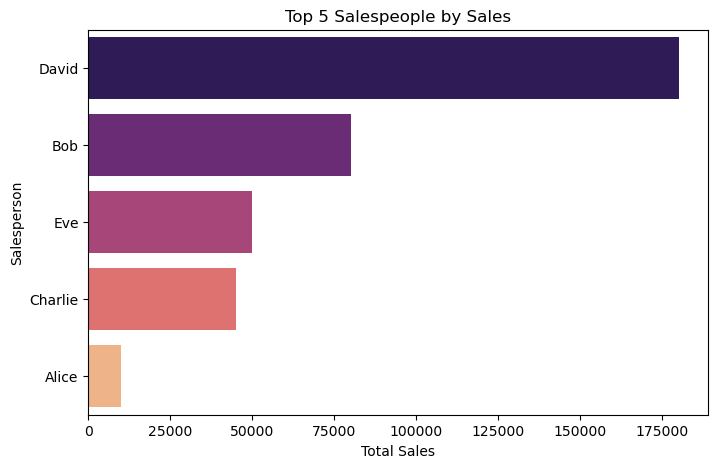

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load file
df = pd.read_csv("SalesDashboard data.csv")  # or pd.read_excel("your_file.xlsx")

# Rename columns to simpler names
df.rename(columns={
    'Order Date': 'Date',
    'Region': 'Region',
    'Salesperson': 'Salesperson',
    'Item Type': 'Product',
    'Units Sold': 'Quantity',
    'Total Revenue': 'Sales'  # Convert to "Sales" for plotting
}, inplace=True)

# Top 5 Salespeople
top_sellers = df.groupby('Salesperson')['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_sellers.values, y=top_sellers.index, palette='magma')
plt.title("Top 5 Salespeople by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Salesperson")
plt.show()


C:\Users\OMSRI\AppData\Local\Temp\ipykernel_19744\4192472712.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="coolwarm")


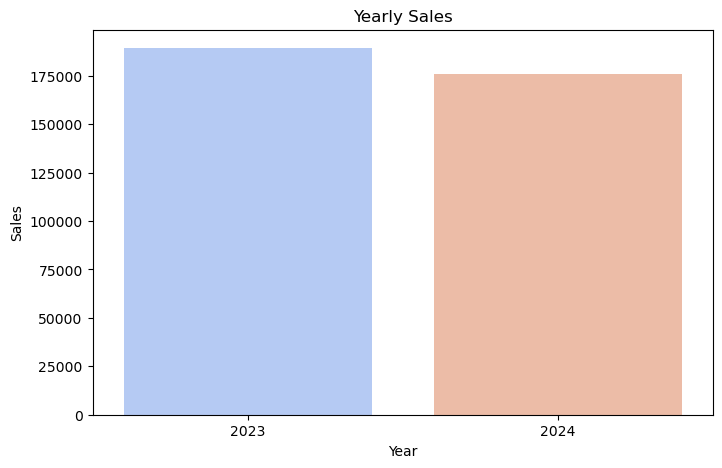

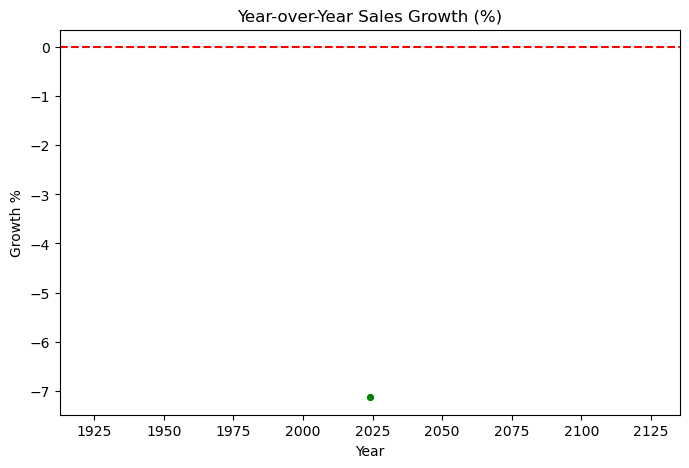

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your file
df = pd.read_csv("SalesDashboard data.csv")  # Or Excel: pd.read_excel("your_file.xlsx")

# If your date column is named "Order Date", convert it to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Extract the year into a new column
df["Year"] = df["Order Date"].dt.year

# If your revenue column is called "Total Revenue", rename it to "Sales"
df.rename(columns={"Total Revenue": "Sales"}, inplace=True)

# Now Year-over-Year Sales Growth
yearly_sales = df.groupby("Year")["Sales"].sum()
growth = yearly_sales.pct_change() * 100  # percentage growth

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="coolwarm")
plt.title("Yearly Sales")
plt.ylabel("Sales")
plt.show()

# Plot growth rate
plt.figure(figsize=(8, 5))
sns.lineplot(x=growth.index, y=growth.values, marker="o", color="green")
plt.title("Year-over-Year Sales Growth (%)")
plt.ylabel("Growth %")
plt.axhline(0, color="red", linestyle="--")
plt.show()


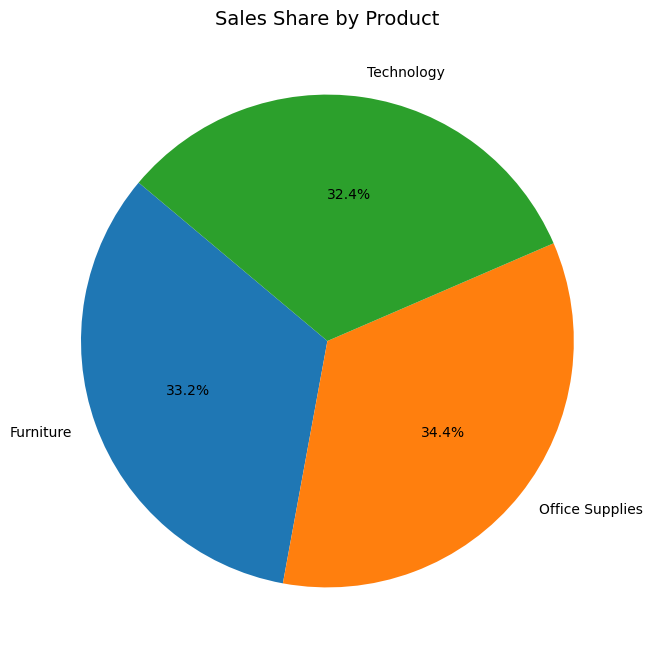

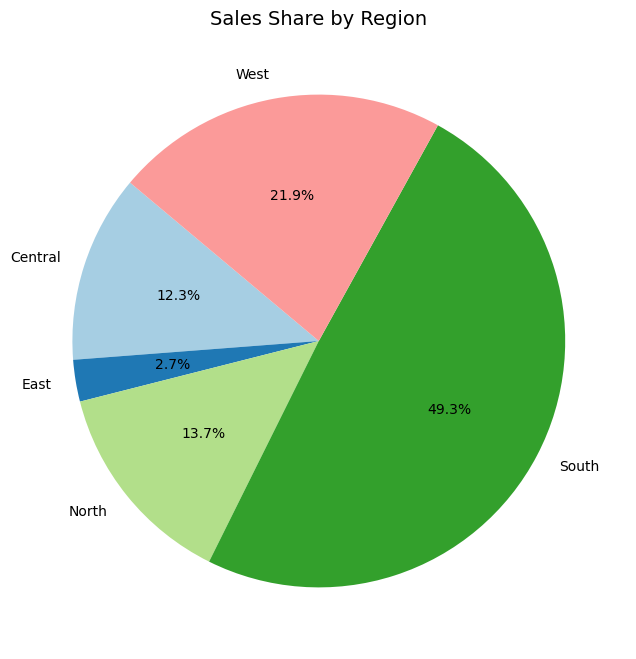

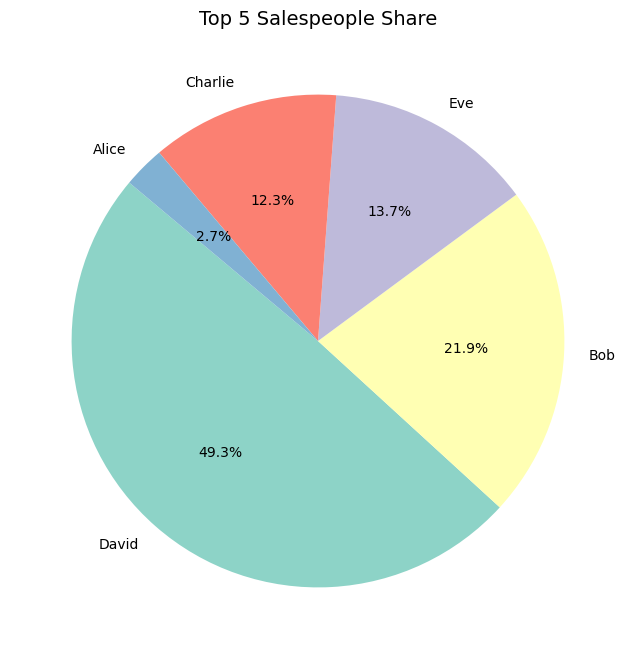

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("SalesDashboard data.csv")  # Or pd.read_excel("your_file.xlsx")

# Rename columns if needed (so we can use 'Sales' consistently)
df.rename(columns={"Total Revenue": "Sales"}, inplace=True)

# === 1. Sales by Product (Pie Chart) ===
if "Item Type" in df.columns:
    sales_by_product = df.groupby("Item Type")["Sales"].sum()

    plt.figure(figsize=(8, 8))
    plt.pie(sales_by_product, labels=sales_by_product.index,
            autopct='%1.1f%%', startangle=140)
    plt.title("Sales Share by Product", fontsize=14)
    plt.show()

# === 2. Sales by Region (Pie Chart) ===
if "Region" in df.columns:
    sales_by_region = df.groupby("Region")["Sales"].sum()

    plt.figure(figsize=(8, 8))
    plt.pie(sales_by_region, labels=sales_by_region.index,
            autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title("Sales Share by Region", fontsize=14)
    plt.show()

# === 3. Sales by Salesperson (Top 5) ===
if "Salesperson" in df.columns:
    top_sellers = df.groupby("Salesperson")["Sales"].sum().nlargest(5)

    plt.figure(figsize=(8, 8))
    plt.pie(top_sellers, labels=top_sellers.index,
            autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
    plt.title("Top 5 Salespeople Share", fontsize=14)
    plt.show()


In [53]:
import pandas as pd

df = pd.read_csv("SalesDashboard data.csv")
print(df.columns)


Index(['Order Date', 'Region', 'Salesperson', 'Item Type', 'Units Sold',
       'Unit Price', 'Total Revenue'],
      dtype='object')


In [54]:
# Example if your columns are like " Total Revenue " with spaces
df.rename(columns={
    'Order Date': 'Date',
    'Item Type': 'Product',
    'Units Sold': 'Quantity',
    'Total Revenue': 'Sales',  # Change to exact column name from step 1
    'Salesperson': 'Salesperson',
    'Region': 'Region'
}, inplace=True)


In [55]:
df.columns = df.columns.str.strip()


In [56]:
region_sales = df.groupby("Region")["Sales"].sum()


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# 1. Load & Prepare Data
# =======================
file_path = "SalesDashboard data.csv"
df = pd.read_csv(file_path)


In [62]:
# Standardize column names
df.rename(columns={
    'Order Date': 'Date',
    'Item Type': 'Product',
    'Units Sold': 'Quantity',
    'Total Revenue': 'Sales',
    'Salesperson': 'Salesperson',
    'Region': 'Region'
}, inplace=True)

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.to_period("M")


In [63]:
# =======================
# 2. Basic Data Insights
# =======================
print("\n===== BASIC INFO =====")
print(df.info())
print("\n===== FIRST 5 ROWS =====")
display(df.head())
print("\n===== SUMMARY =====")
display(df.describe())



===== BASIC INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         100 non-null    datetime64[ns]
 1   Region       100 non-null    object        
 2   Salesperson  100 non-null    object        
 3   Product      100 non-null    object        
 4   Quantity     100 non-null    int64         
 5   Unit Price   100 non-null    int64         
 6   Sales        100 non-null    int64         
 7   Year         100 non-null    int32         
 8   Month        100 non-null    period[M]     
dtypes: datetime64[ns](1), int32(1), int64(3), object(3), period[M](1)
memory usage: 6.8+ KB
None

===== FIRST 5 ROWS =====


,Date,Region,Salesperson,Product,Quantity,Unit Price,Sales,Year,Month
0,2023-01-01,East,Alice,Office Supplies,10,50,500,2023,2023-01
1,2023-01-08,West,Bob,Technology,20,200,4000,2023,2023-01
2,2023-01-15,Central,Charlie,Furniture,15,150,2250,2023,2023-01
3,2023-01-22,South,David,Office Supplies,30,300,9000,2023,2023-01
4,2023-01-29,North,Eve,Technology,25,100,2500,2023,2023-01



===== SUMMARY =====


,Date,Quantity,Unit Price,Sales,Year
count,100,100.000000,100.000000,100.000000,100.000000
mean,2023-12-13 12:00:00,20.000000,160.000000,3650.000000,2023.470000
min,2023-01-01 00:00:00,10.000000,50.000000,500.000000,2023.000000
25%,2023-06-23 06:00:00,15.000000,100.000000,2250.000000,2023.000000
50%,2023-12-13 12:00:00,20.000000,150.000000,2500.000000,2023.000000
75%,2024-06-03 18:00:00,25.000000,200.000000,4000.000000,2024.000000
max,2024-11-24 00:00:00,30.000000,300.000000,9000.000000,2024.000000
std,NaN,7.106691,86.456622,2911.141954,0.501614


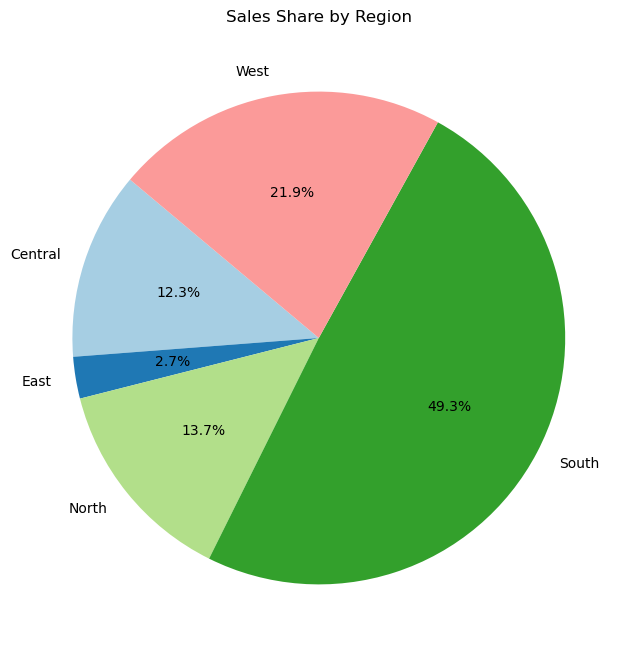

In [64]:
# --- Region Sales Pie Chart ---
region_sales = df.groupby("Region")["Sales"].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%',
        startangle=140, colors=plt.cm.Paired.colors)
plt.title("Sales Share by Region")
plt.show()


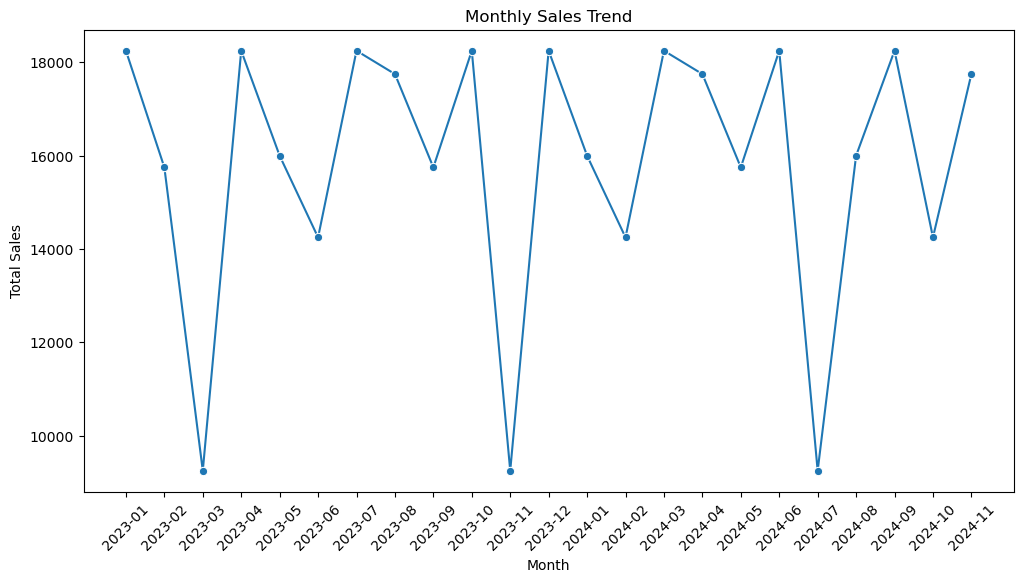


Cleaned and analyzed data saved to 'SalesDashboard_cleaned.csv'


In [66]:
# --- Monthly Sales Trend ---
monthly_sales = df.groupby("Month")["Sales"].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.show()

# =======================
# 4. Save Processed Data
# =======================
df.to_csv("SalesDashboard_cleaned.csv", index=False)
print("\nCleaned and analyzed data saved to 'SalesDashboard_cleaned.csv'")


In [68]:
# sales_analysis.py

import pandas as pd
import matplotlib.pyplot as plt

class SalesAnalysis:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        self.df.columns = self.df.columns.str.strip()  # Clean column names

    def info(self):
        """Display basic info and first 5 rows."""
        print("\n===== INFO =====")
        print(self.df.info())
        print("\n===== FIRST 5 ROWS =====")
        display(self.df.head())

    def summary(self):
        """Show summary statistics and missing values."""
        print("\n===== SUMMARY =====")
        display(self.df.describe())
        print("\n===== MISSING VALUES =====")
        print(self.df.isnull().sum())

    def total_sales(self, column='Total Revenue'):
        """Calculate total sales."""
        if column in self.df.columns:
            total = self.df[column].sum()
            print(f"\nTotal {column}: {total}")
            return total
        else:
            print(f"Column '{column}' not found.")
            return None

    def sales_by_product(self, product_col='Item Type', sales_col='Total Revenue'):
        """Plot bar chart of sales by product."""
        if product_col in self.df.columns and sales_col in self.df.columns:
            product_sales = self.df.groupby(product_col)[sales_col].sum().sort_values(ascending=False)
            plt.figure(figsize=(8,5))
            product_sales.plot(kind='bar', color='skyblue')
            plt.title("Sales by Product")
            plt.ylabel(sales_col)
            plt.xlabel(product_col)
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Columns '{product_col}' or '{sales_col}' not found.")

    def sales_by_region(self, region_col='Region', sales_col='Total Revenue'):
        """Plot pie chart of sales by region."""
        if region_col in self.df.columns and sales_col in self.df.columns:
            region_sales = self.df.groupby(region_col)[sales_col].sum()
            plt.figure(figsize=(6,6))
            plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
            plt.title("Sales Share by Region")
            plt.show()
        else:
            print(f"Columns '{region_col}' or '{sales_col}' not found.")


In [70]:
# sales_analysis_numeric.py

import pandas as pd

class SalesAnalysisNumeric:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        self.df.columns = self.df.columns.str.strip()  # Clean column names
        # Convert date
        if 'Order Date' in self.df.columns:
            self.df['Date'] = pd.to_datetime(self.df['Order Date'], errors='coerce')
            self.df['Year'] = self.df['Date'].dt.year

        # Compute revenue per unit if columns exist
        if 'Total Revenue' in self.df.columns and 'Units Sold' in self.df.columns:
            self.df['Revenue per Unit'] = self.df['Total Revenue'] / self.df['Units Sold']

    def basic_info(self):
        """Show basic info, head, and summary statistics"""
        print("\n===== INFO =====")
        print(self.df.info())
        print("\n===== FIRST 5 ROWS =====")
        display(self.df.head())
        print("\n===== SUMMARY =====")
        display(self.df.describe())
        print("\n===== MISSING VALUES =====")
        print(self.df.isnull().sum())

    def total_sales_summary(self, sales_col='Total Revenue'):
        """Total sales and quantity summary"""
        if sales_col in self.df.columns:
            total_sales = self.df[sales_col].sum()
            total_units = self.df['Units Sold'].sum() if 'Units Sold' in self.df.columns else 'N/A'
            avg_order_value = self.df[sales_col].mean()
            max_sale = self.df[sales_col].max()
            min_sale = self.df[sales_col].min()
            print(f"\nTotal Sales: {total_sales}")
            print(f"Total Units Sold: {total_units}")
            print(f"Average Order Value: {avg_order_value}")
            print(f"Max Sale: {max_sale}, Min Sale: {min_sale}")

    def top_products(self, product_col='Item Type', sales_col='Total Revenue', top_n=5):
        """Top products by total revenue"""
        if product_col in self.df.columns and sales_col in self.df.columns:
            top = self.df.groupby(product_col)[sales_col].sum().sort_values(ascending=False).head(top_n)
            print(f"\nTop {top_n} Products by Sales:")
            print(top)

    def top_salespeople(self, sales_col='Total Revenue', salesperson_col='Salesperson', top_n=5):
        """Top salespeople by revenue"""
        if salesperson_col in self.df.columns and sales_col in self.df.columns:
            top = self.df.groupby(salesperson_col)[sales_col].sum().sort_values(ascending=False).head(top_n)
            print(f"\nTop {top_n} Salespeople by Sales:")
            print(top)

    def region_analysis(self, region_col='Region', sales_col='Total Revenue'):
        """Sales by region and percentage contribution"""
        if region_col in self.df.columns and sales_col in self.df.columns:
            region_sales = self.df.groupby(region_col)[sales_col].sum()
            region_percent = (region_sales / region_sales.sum()) * 100
            print("\nSales by Region:")
            print(region_sales)
            print("\nPercentage Contribution by Region:")
            print(region_percent)

    def yearly_sales_analysis(self, sales_col='Total Revenue'):
        """Yearly sales and growth percentage"""
        if 'Year' in self.df.columns and sales_col in self.df.columns:
            yearly_sales = self.df.groupby('Year')[sales_col].sum()
            growth = yearly_sales.pct_change() * 100
            print("\nYearly Sales:")
            print(yearly_sales)
            print("\nYear-over-Year Growth (%):")
            print(growth)

    def revenue_per_unit_summary(self):
        """Average revenue per unit"""
        if 'Revenue per Unit' in self.df.columns:
            avg_rev = self.df['Revenue per Unit'].mean()
            print(f"\nAverage Revenue per Unit: {avg_rev}")


In [78]:
import pandas as pd

df = pd.read_csv("SalesDashboard data.csv")
df.columns = df.columns.str.strip()  # remove extra spaces


In [79]:
df['Date'] = pd.to_datetime(df['Order Date'], errors='coerce')  # Use your exact date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()  # Gives 'January', 'February', etc.


In [80]:
sales_col = 'Total Revenue'  # Use the exact name in your CSV

# Pivot table for seasonality heatmap
pivot_data = df.pivot_table(index='Month', columns='Year', values=sales_col, aggfunc='sum')

# Optional: reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_data = pivot_data.reindex(month_order)

print(pivot_data)


Year          2023     2024
Month                      
January    18250.0  16000.0
February   15750.0  14250.0
March       9250.0  18250.0
April      18250.0  17750.0
May        16000.0  15750.0
June       14250.0  18250.0
July       18250.0   9250.0
August     17750.0  16000.0
September  15750.0  18250.0
October    18250.0  14250.0
November    9250.0  17750.0
December   18250.0      NaN


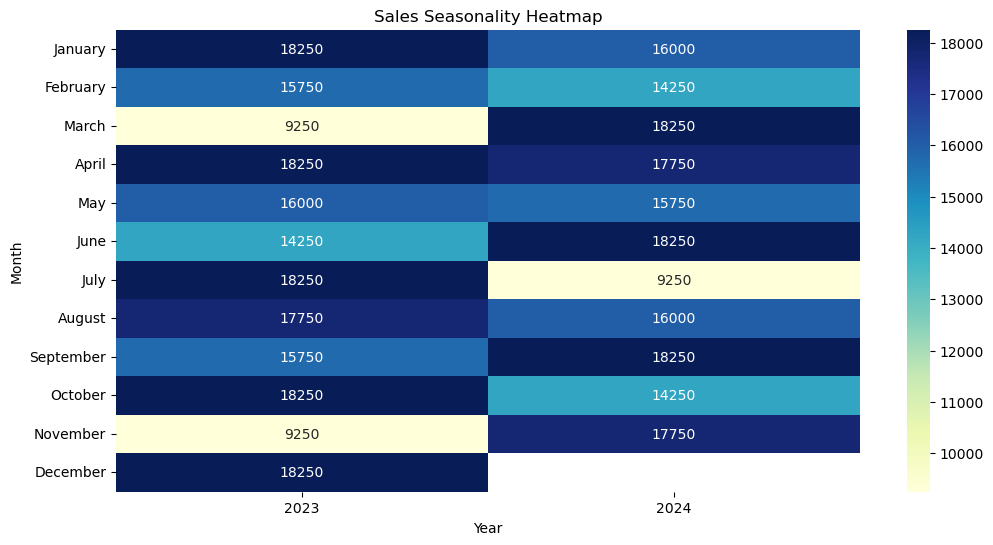

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Load CSV and clean columns
df = pd.read_csv("SalesDashboard data.csv")
df.columns = df.columns.str.strip()  # remove extra spaces

# 2️⃣ Convert date and extract Year & Month
df['Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()  # e.g., January, February

# 3️⃣ Set the correct sales column
sales_col = 'Total Revenue'  # Replace with exact column name if different

# 4️⃣ Pivot table for heatmap
pivot_data = df.pivot_table(index='Month', columns='Year', values=sales_col, aggfunc='sum')

# 5️⃣ Reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_data = pivot_data.reindex(month_order)

# 6️⃣ Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Seasonality Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()


In [83]:
import pandas as pd

# 1️⃣ Load CSV and clean columns
df = pd.read_csv("SalesDashboard data.csv")
df.columns = df.columns.str.strip()  # remove extra spaces

# 2️⃣ Set correct sales column
sales_col = 'Total Revenue'  # Replace with exact name if different
product_col = 'Item Type'    # Replace with your product column name

# 3️⃣ Group by product and calculate total sales
product_sales = df.groupby(product_col)[sales_col].sum().sort_values(ascending=True)  # ascending=True for lowest

# 4️⃣ Show the lowest 5 performing products
lowest_products = product_sales.head(5)
print("Lowest Performing Products:")
print(lowest_products)


Lowest Performing Products:
Item Type
Technology         118250
Furniture          121250
Office Supplies    125500
Name: Total Revenue, dtype: int64


In [84]:
import pandas as pd

# 1️⃣ Load CSV and clean columns
df = pd.read_csv("SalesDashboard data.csv")
df.columns = df.columns.str.strip()

# 2️⃣ Set correct columns
sales_col = 'Total Revenue'      # Sales column
product_col = 'Item Type'        # Product column
salesperson_col = 'Salesperson'  # Salesperson column

# 3️⃣ Basic Sales Stats
total_sales = df[sales_col].sum()
total_units = df['Units Sold'].sum() if 'Units Sold' in df.columns else 'N/A'
avg_order_value = df[sales_col].mean()
max_sale = df[sales_col].max()
min_sale = df[sales_col].min()

print("===== SALES SUMMARY =====")
print(f"Total Sales: {total_sales}")
print(f"Total Units Sold: {total_units}")
print(f"Average Order Value: {avg_order_value}")
print(f"Max Sale: {max_sale}, Min Sale: {min_sale}\n")

# 4️⃣ Top 5 Products
top_products = df.groupby(product_col)[sales_col].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Sales:")
print(top_products, "\n")

# 5️⃣ Bottom 5 Products
bottom_products = df.groupby(product_col)[sales_col].sum().sort_values(ascending=True).head(5)
print("Bottom 5 Products by Sales:")
print(bottom_products, "\n")

# 6️⃣ Top 5 Salespeople
top_salespeople = df.groupby(salesperson_col)[sales_col].sum().sort_values(ascending=False).head(5)
print("Top 5 Salespeople by Sales:")
print(top_salespeople, "\n")

# 7️⃣ Bottom 5 Salespeople
bottom_salespeople = df.groupby(salesperson_col)[sales_col].sum().sort_values(ascending=True).head(5)
print("Bottom 5 Salespeople by Sales:")
print(bottom_salespeople)


===== SALES SUMMARY =====
Total Sales: 365000
Total Units Sold: 2000
Average Order Value: 3650.0
Max Sale: 9000, Min Sale: 500

Top 5 Products by Sales:
Item Type
Office Supplies    125500
Furniture          121250
Technology         118250
Name: Total Revenue, dtype: int64 

Bottom 5 Products by Sales:
Item Type
Technology         118250
Furniture          121250
Office Supplies    125500
Name: Total Revenue, dtype: int64 

Top 5 Salespeople by Sales:
Salesperson
David      180000
Bob         80000
Eve         50000
Charlie     45000
Alice       10000
Name: Total Revenue, dtype: int64 

Bottom 5 Salespeople by Sales:
Salesperson
Alice       10000
Charlie     45000
Eve         50000
Bob         80000
David      180000
Name: Total Revenue, dtype: int64


ModuleNotFoundError: No module named 'sales_report'